In [1]:
! pip install kaggle
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"sayansh001","key":"a0517fbadb8c251d521b847def10336f"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [2]:
! kaggle datasets download -d lsind18/gemstones-images

 74% 41.0M/55.2M [00:01<00:00, 19.6MB/s]
100% 55.2M/55.2M [00:01<00:00, 34.7MB/s]


In [3]:
! unzip /content/gemstones-images.zip

Archive:  /content/gemstones-images.zip
  inflating: test/Alexandrite/alexandrite_18.jpg  
  inflating: test/Alexandrite/alexandrite_28.jpg  
  inflating: test/Alexandrite/alexandrite_3.jpg  
  inflating: test/Alexandrite/alexandrite_6.jpg  
  inflating: test/Almandine/almandine_18.jpg  
  inflating: test/Almandine/almandine_28.jpg  
  inflating: test/Almandine/almandine_3.jpg  
  inflating: test/Almandine/almandine_9.jpg  
  inflating: test/Amazonite/amazonite_18.jpg  
  inflating: test/Amazonite/amazonite_28.jpg  
  inflating: test/Amazonite/amazonite_3.jpg  
  inflating: test/Amazonite/amazonite_8.jpg  
  inflating: test/Amber/amber_18.jpg  
  inflating: test/Amber/amber_28.jpg  
  inflating: test/Amber/amber_3.jpg  
  inflating: test/Amber/amber_9.jpg  
  inflating: test/Amethyst/amethyst_18.jpg  
  inflating: test/Amethyst/amethyst_3.jpg  
  inflating: test/Amethyst/amethyst_5.jpg  
  inflating: test/Amethyst/amethyst_7.jpg  
  inflating: test/Ametrine/ametrine_18.jpg  
  inflatin

In [4]:
from keras.layers import Input,Lambda,Dense,Flatten,Conv2D
from keras.models import Model
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.models import Sequential
from glob import glob
import numpy as np
import pandas as pd
import cv2
import tensorflow as tf
from PIL import Image
import os

In [5]:
folders = glob('/content/train/*')
print(len(folders))

87


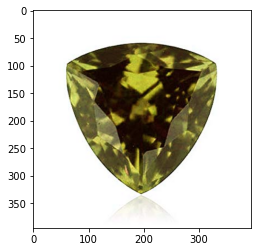

In [6]:
import matplotlib.pyplot as plt
img=cv2.imread(r"/content/train/Alexandrite/alexandrite_12.jpg")
plt.imshow(img)
plt.show()

In [7]:
class_names=[]
for class_name in os.listdir('/content/train'):
    class_names.append(class_name)
class_names = sorted(class_names)
print(class_names)

['Alexandrite', 'Almandine', 'Amazonite', 'Amber', 'Amethyst', 'Ametrine', 'Andalusite', 'Andradite', 'Aquamarine', 'Aventurine Green', 'Aventurine Yellow', 'Benitoite', 'Beryl Golden', 'Bixbite', 'Bloodstone', 'Blue Lace Agate', 'Carnelian', 'Cats Eye', 'Chalcedony', 'Chalcedony Blue', 'Chrome Diopside', 'Chrysoberyl', 'Chrysocolla', 'Chrysoprase', 'Citrine', 'Coral', 'Danburite', 'Diamond', 'Diaspore', 'Dumortierite', 'Emerald', 'Fluorite', 'Garnet Red', 'Goshenite', 'Grossular', 'Hessonite', 'Hiddenite', 'Iolite', 'Jade', 'Jasper', 'Kunzite', 'Kyanite', 'Labradorite', 'Lapis Lazuli', 'Larimar', 'Malachite', 'Moonstone', 'Morganite', 'Onyx Black', 'Onyx Green', 'Onyx Red', 'Opal', 'Pearl', 'Peridot', 'Prehnite', 'Pyrite', 'Pyrope', 'Quartz Beer', 'Quartz Lemon', 'Quartz Rose', 'Quartz Rutilated', 'Quartz Smoky', 'Rhodochrosite', 'Rhodolite', 'Rhodonite', 'Ruby', 'Sapphire Blue', 'Sapphire Pink', 'Sapphire Purple', 'Sapphire Yellow', 'Scapolite', 'Serpentine', 'Sodalite', 'Spessartite

OR

# **Data Augmentation**

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                   shear_range=0.2,
                                   zoom_range=0.2)

training_set = train_datagen.flow_from_directory(r'/content/train',
                                                 target_size=(224,224),
                                                 batch_size=32,
                                                 class_mode='categorical')

Found 2856 images belonging to 87 classes.


In [9]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(r'/content/test',
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 363 images belonging to 87 classes.


In [10]:
training_set.class_indices

{'Alexandrite': 0,
 'Almandine': 1,
 'Amazonite': 2,
 'Amber': 3,
 'Amethyst': 4,
 'Ametrine': 5,
 'Andalusite': 6,
 'Andradite': 7,
 'Aquamarine': 8,
 'Aventurine Green': 9,
 'Aventurine Yellow': 10,
 'Benitoite': 11,
 'Beryl Golden': 12,
 'Bixbite': 13,
 'Bloodstone': 14,
 'Blue Lace Agate': 15,
 'Carnelian': 16,
 'Cats Eye': 17,
 'Chalcedony': 18,
 'Chalcedony Blue': 19,
 'Chrome Diopside': 20,
 'Chrysoberyl': 21,
 'Chrysocolla': 22,
 'Chrysoprase': 23,
 'Citrine': 24,
 'Coral': 25,
 'Danburite': 26,
 'Diamond': 27,
 'Diaspore': 28,
 'Dumortierite': 29,
 'Emerald': 30,
 'Fluorite': 31,
 'Garnet Red': 32,
 'Goshenite': 33,
 'Grossular': 34,
 'Hessonite': 35,
 'Hiddenite': 36,
 'Iolite': 37,
 'Jade': 38,
 'Jasper': 39,
 'Kunzite': 40,
 'Kyanite': 41,
 'Labradorite': 42,
 'Lapis Lazuli': 43,
 'Larimar': 44,
 'Malachite': 45,
 'Moonstone': 46,
 'Morganite': 47,
 'Onyx Black': 48,
 'Onyx Green': 49,
 'Onyx Red': 50,
 'Opal': 51,
 'Pearl': 52,
 'Peridot': 53,
 'Prehnite': 54,
 'Pyrite': 5

This will also display class names 
- gem_labels = [gem for gem in training_Set.class_indices]
- gem_labels

# **Model Building**
VGG16 Transfer Learning Technique

In [11]:
vgg = VGG16(input_shape=[224,224,3],weights='imagenet',include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [12]:
for layer in vgg.layers:
    layer.trainable = False

Since we have different number of labels or output we need to flattened the last layer so we can add our own dense laye

In [13]:
x = Flatten()(vgg.output)

We use softmax activation function since we are dealing with multiclass classification problem, the 87 represent the number of output we are expecting.

In [14]:
vgg_output = Dense(len(folders),activation='softmax')(x)
#This is the last layer cnsisting of the various classes we are replacing the include_top = False layer with this one

In [15]:
model = Model(inputs=vgg.input, outputs=vgg_output)

Having a look at the Model summary

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [17]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
cnn = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
90/90 [==============================] - 77s 614ms/step - loss: 4.0397 - accuracy: 0.2325 - val_loss: 2.7857 - val_accuracy: 0.3416
Epoch 2/20
90/90 [==============================] - 48s 527ms/step - loss: 1.6095 - accuracy: 0.5760 - val_loss: 2.5650 - val_accuracy: 0.4353
Epoch 3/20
90/90 [==============================] - 48s 529ms/step - loss: 1.0500 - accuracy: 0.7157 - val_loss: 2.4590 - val_accuracy: 0.4959
Epoch 4/20
90/90 [==============================] - 48s 529ms/step - loss: 0.7775 - accuracy: 0.7857 - val_loss: 2.3916 - val_accuracy: 0.4793
Epoch 5/20
90/90 [==============================] - 48s 527ms/step - loss: 0.5765 - accuracy: 0.8337 - val_loss: 2.1849 - val_accuracy: 0.5234
Epoch 6/20
90/90 [==============================] - 48s 529ms/step - loss: 0.4643 - accuracy: 0.8631 - val_loss: 2.1942 - val_accuracy: 0.5152
Epoch 7/20
90/90 [==============================] - 48s 531ms/step - loss: 0.3487 - accuracy: 0.8978 - val_loss: 2.2464 - val_accuracy: 0.5317

In [22]:
import gradio as gr
def gem_indentify(image):
  img=image.reshape(-1,224,224,3)
  pred=model.predict(img)[0]
  return {class_names[i]: float(pred[i]) for i in range(87)}

In [23]:
image = gr.inputs.Image(shape=(224,224))
label = gr.outputs.Label(num_top_classes=7)

In [24]:
gr.Interface(fn=gem_indentify, inputs=image, outputs=label,interpretation='default').launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://19209.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7860/',
 'https://19209.gradio.app')